<a href="https://colab.research.google.com/github/prakash4191/project_hotelbooking/blob/main/updated_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of the Hotel Booking

We will use the Hotel Booking dataset for analysis

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. 

We will try to answer the following Questions

Have you ever wondered when the best time of year to book a hotel room is?

Or #the optimal length of stay in order to get the best daily rate?

What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

What are the Top 10 Countries of Origin of Hotel visitors (Guests) -Which Month is the Most Occupied with Bookings at the Hotel?

-How many Bookings were Cancelled at the Hotel?

-Which Month Has Highest Number of Cancellations By Hotel Type?

-How many Bookings were Cancelled by Hotel Type?

-Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status

-Total Number of Bookings by Market Segment

-Arrival Date Year vs Lead Time By Booking Cancellation Status

-Relationship between Special Requests and Cancellations

-How does the ADR Vary Over the Year by Hotel Type

-What is the Effect of Deposit Type on Cancellations

- % of customer requrired for parking spaces

# First Import necessary packages and import the dataset

In [84]:
#importing pandas,numpy,seaborn,matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem. 2.Univariable study. We'll just focus on the dependent variable and try to know a little bit more about it.

3.Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4.Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5.Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [85]:
#Mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Mounting path of data from google drive and reading csv file 

hb=pd.read_csv('/content/drive/MyDrive/DS/PROJECT/HOTEL BOOKING/Copy of Hotel Bookings.csv')

In [87]:
# Extracting infromation from 
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#Dealing with Missing Values
Checking if data contains any missing values

In [88]:
hb.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

Children column contains the count of children, so we will replace all the missing values


In [89]:
hb['children'].fillna(0,inplace=True)
hb['country'].fillna('xyz',inplace=True)
hb.drop(['agent','company'],axis=1,inplace=True)

In [90]:
hb.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [91]:
hb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              


# 1.What are the Top 10 Countries of Origin of Hotel visitors (Guests)


In [92]:
hb['country'].value_counts().head(10)

hb2 = hb["country"].value_counts().head(10)
hb2

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 0, 'Country')

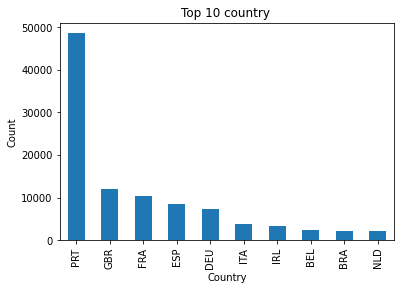

In [93]:
hb['country'].value_counts().head(10)

hb2 = hb["country"].value_counts().head(10)
hb2.plot(kind='bar')

plt.title('Top 10 country ')
plt.ylabel('Count')
plt.xlabel('Country')

Portugal, GBR ,France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

#2.Which Month is the Most Occupied with Bookings at the Hotel?

In [94]:
hb['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

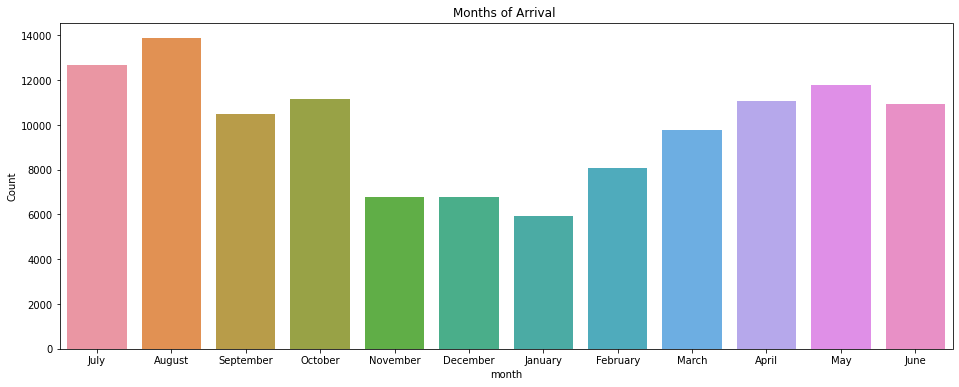

In [95]:
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month', data= hb)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()


August,July,May,october and April are the top month where booking has been done by  guests.

# 3.What is the booking ratio between Resort Hotel and City Hotel?

In [96]:
# hotel Booking
hb['hotel'].value_counts().head()


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

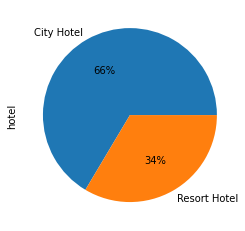

In [97]:
hotels=hb['hotel'].value_counts()
hotels.plot(kind='pie',autopct='%1.0f%%')



**Most Of the people have booked the City hotel

#4.How many Bookings were Cancelled at the Hotel?

In [130]:
# 0 booking not-cancel 
# 1 booking cancel

hb['is_canceled'].value_counts()

plt.figure(figsize=(12,4))
sns.countplot(x='is_canceled',hue='hotel' data= hb)
plt.title('Cancellation Situation')
plt.show()
rects = ax.patches


SyntaxError: ignored

Text(0.5, 0, 'Pcountry')

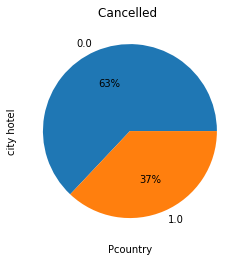

most of the time booking got cancel

#5.Total Number of Bookings by Market Segment

Text(0.5, 0, 'Segment')

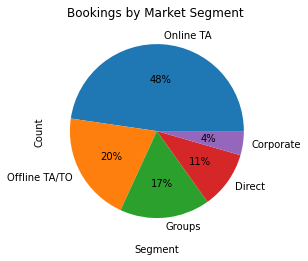

In [100]:
hb['market_segment'].value_counts().head()

hb3 = hb['market_segment'].value_counts().head()

hb3.plot(kind='pie',autopct='%1.0f%%')


plt.title('Bookings by Market Segment ')
plt.ylabel('Count')
plt.xlabel('Segment')

In market segment most of the booking have been doen Onlne 

#6.Arrival per year 

2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64


Text(0.5, 0, 'Year')

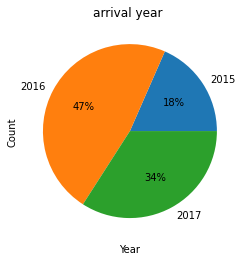

In [101]:
hb['arrival_date_year'].sort_index().value_counts(sort=False)

hb4 = hb['arrival_date_year'].sort_index().value_counts(sort=False)
print(hb4)
hb4.plot(kind='pie',autopct='%1.0f%%')

plt.title('arrival year ')
plt.ylabel('Count')
plt.xlabel('Year')

In 2016 More booking was been done as compare with 2015 and 2017

#7.Arrival Date Year vs Lead Time By Booking Cancellation Status

Text(0, 0.5, 'ADR')

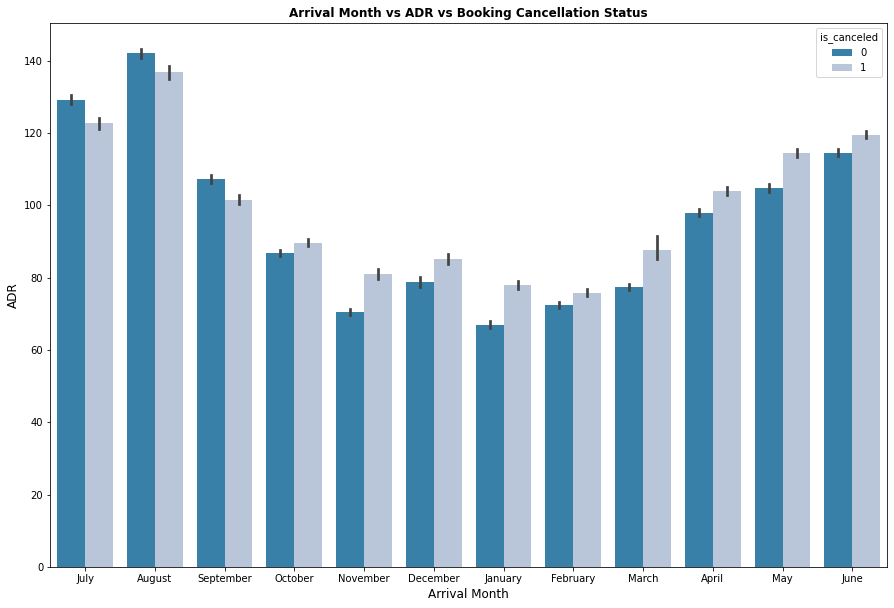

In [102]:
hb['adr'] = hb['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette='PuBu_r', data=hb)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# 8.How Long People Stay in the hotel

In [103]:
hb['total_staying_nights'] = hb['stays_in_week_nights'] + hb['stays_in_weekend_nights']

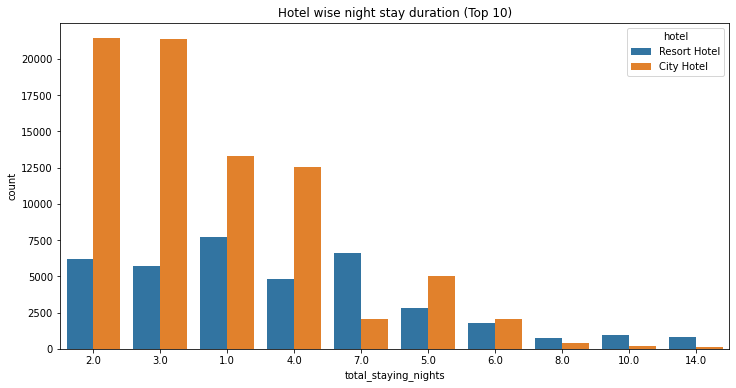

In [104]:

hb.loc['total_staying_nights'] = hb['stays_in_weekend_nights']+ hb['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_staying_nights', hue='hotel', data=hb,
              order = hb.total_staying_nights.value_counts().iloc[:10].index, ax=ax);

Most people stay for one, two, or three. More than 60% of guests come under these three options.

Text(0.5, 0, 'hotel')

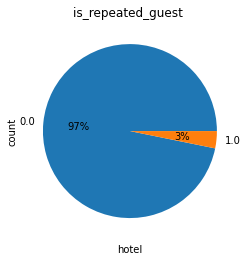

In [105]:
hb5=hb['is_repeated_guest'].value_counts()
hb5.plot(kind='pie',autopct='%1.0f%%')

plt.title('is_repeated_guest ')
plt.ylabel('count')
plt.xlabel('hotel')

# 9. preference of MEAL

In [106]:
hb['meal'].value_counts().head(10)

hb20=hb['meal'].value_counts().head(10)
hb20

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 0, 'MEAL')

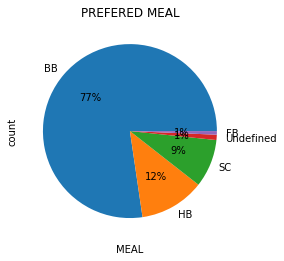

In [107]:
hb20=hb['meal'].value_counts().head(10)
hb20.plot(kind='pie',autopct='%1.0f%%')

plt.title('PREFERED MEAL')
plt.ylabel('count')
plt.xlabel('MEAL')

# 10. Hotel preference by Customer Type 

In [111]:
hb['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group', nan],
      dtype=object)

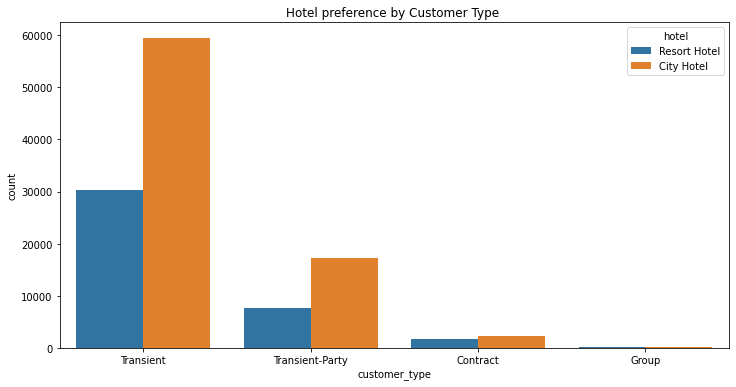

In [115]:


fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel preference by Customer Type ')
sns.countplot(x='customer_type', hue='hotel', data=hb,
              order = hb.customer_type.value_counts().iloc[:10].index, ax=ax);

# 11. Rate of Cancellation

Text(0.5, 1.0, 'Cancelled ')

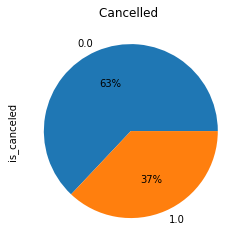

In [122]:
# 0 booking not-cancel 
# 1 booking cancel

hb3=hb['is_canceled'].value_counts()
hb3.plot(kind='pie',autopct='%1.0f%%')

plt.title('Cancelled ')


# 12. Rate of Cancellation by Hotel Type

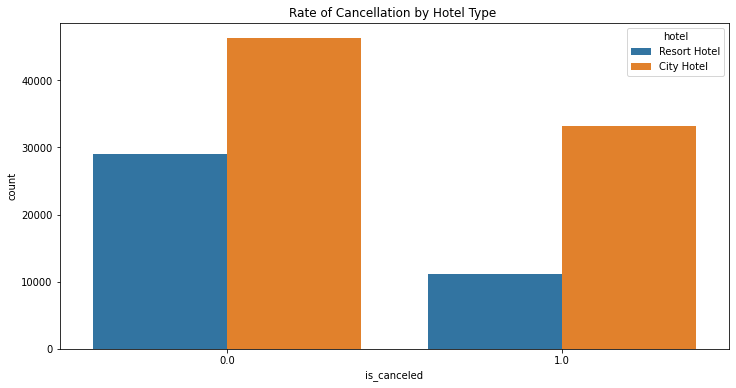

In [132]:

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('is_canceled')
ax.set_ylabel('No of Nights')
ax.set_title('Rate of Cancellation by Hotel Type ')
sns.countplot(x='is_canceled', hue='hotel', data=hb,
              order = hb.is_canceled.value_counts().iloc[:10].index, ax=ax);

In [117]:
hb['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K', nan],
      dtype=object)

In [118]:
hb['assigned_room_type'].value_counts().head(10)

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
Name: assigned_room_type, dtype: int64

In [109]:
hb['total_of_special_requests'].value_counts().head(10)

0.0    70318
1.0    33226
2.0    12969
3.0     2497
4.0      340
5.0       40
Name: total_of_special_requests, dtype: int64

0.resort
